# Exploratory data analysis for Stargate

In [4]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. floor table

In [109]:
floor = pd.read_csv("floor_CLEANED.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
print(floor.columns)
print(floor.shape)
floor.head()

Index(['uuid', 'property_id', 'harvest_id', 'floor_id', 'stargate_floor_id',
       'stargate_property_id', '_fivetran_synced', 'FIVETRAN_ERROR',
       'average_office_desk_count', 'desk_count', 'elevation', 'floor_id.1',
       'floor_to_bottom_of_beam', 'floor_to_floor', 'floorplan_image_extents',
       'geometric_level', 'gsf', 'name', 'nysf', 'outline', 'rsf',
       'soft_seating_count', 'stage', 'stargate_floor_id.1', 'usf',
       'usf_per_desk', 'uuid_from_data'],
      dtype='object')
(40276, 27)


,uuid,property_id,harvest_id,floor_id,stargate_floor_id,stargate_property_id,_fivetran_synced,FIVETRAN_ERROR,average_office_desk_count,desk_count,...,name,nysf,outline,rsf,soft_seating_count,stage,stargate_floor_id.1,usf,usf_per_desk,uuid_from_data
0,d25b0d13-64f0-44f8-a2e6-7469279c9fed,a95ce973-948b-11e7-9d13-0642b0acf810,27fdf1f1-84ef-4418-a08a-b0cbff9f7e27,6e4ed9f8-949a-11e7-9d13-0642b0acf810,NaN,NaN,2018-05-13 01:07:50.052,NaN,NaN,214.0,...,1ST FLOOR,NaN,"[['(201.643957631986, 67.0003857598667, 12)', ...",NaN,NaN,Open,NaN,11300.578816,NaN,e49c10a5-2f67-4b01-ad19-ede3da84c26e-0071368b
1,40e475dc-f664-4723-afaa-f8bbe3fa9326,f7b141a0-8e11-0132-226b-1efb49eb59b4,b5d1aa7b-aae7-4f78-9e8c-014c21373b31,dea128fa-0e12-11e6-9312-063c4950d72f,4646.0,3521.0,2018-05-13 01:07:49.573,NaN,NaN,470.0,...,29TH FLOOR,NaN,NaN,NaN,NaN,Open,4646.0,27531.000000,NaN,3163c5f6-ceae-40a9-a1e6-17ca672d37f8-005445ea
2,03a8d852-cfca-4777-bb8b-1becefb90e03,5e8d8f30-aef7-0132-a603-3ecb6520abc5,f3bd0cc7-b868-4275-b384-15b2bc5240e2,dea13e3f-0e12-11e6-9312-063c4950d72f,4842.0,4837.0,2018-05-13 01:07:49.376,NaN,NaN,32.0,...,1ST FLOOR,NaN,NaN,NaN,NaN,Open,4842.0,4628.060000,NaN,650a0288-059c-4a9a-ba4e-52a71cfb3bcb-00671d80
3,940f770e-ef10-4a02-9e9f-62d0781a1b98,55c2ae8d-1e01-11e6-9312-063c4950d72f,3256f5ac-ed6f-43c6-8346-c7ac11bbc58b,b98d53e0-239c-11e6-9312-063c4950d72f,8044.0,7426.0,2018-05-13 01:07:49.853,NaN,NaN,639.0,...,4TH FLOOR,NaN,NaN,NaN,NaN,Test Fit,8044.0,29229.000000,NaN,f62afe97-1e64-4854-b51f-7fed19dbc8df-00551d13
4,f229ad66-95cf-4f4f-af6a-fbea0744c7a7,27b184e0-45d9-11e7-a99c-063c4950d72f,0b1abac3-acce-4d7f-b951-f27604797ecb,d7416af3-6785-11e7-a99c-063c4950d72f,11072.0,NaN,2018-05-13 01:07:50.143,NaN,NaN,383.0,...,9TH FLOOR,NaN,None,NaN,NaN,Pre-Design,11072.0,18860.000000,NaN,dd5423c7-a5b6-4bdd-b963-af6c6f90864d-007a0593


# of whole floor plan 40276
# of Single-level project 7556
# of Multi-level project 7225


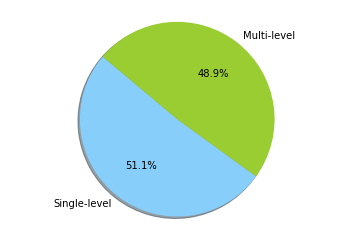

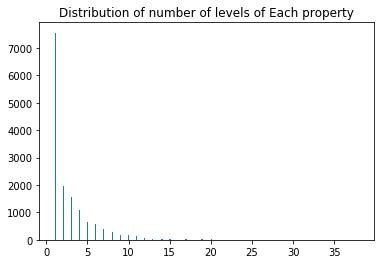

<Figure size 432x288 with 0 Axes>

In [115]:
# Check Multi-level vs Single-level
print('# of whole floor plan', floor.shape[0])
print('# of Single-level project', sum(floor.harvest_id.value_counts() == 1))
print('# of Multi-level project', sum(floor.harvest_id.value_counts() != 1))

# Data to plot
labels = ['Single-level', 'Multi-level']
sizes = [sum(floor.harvest_id.value_counts() == 1), sum(floor.harvest_id.value_counts() != 1)]
colors = ['lightskyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

# Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Histgram  
a = list(floor.harvest_id.value_counts())
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of number of levels of Each property")
plt.show()
plt.savefig('books_read.png')

In [117]:
# Check stage
floor.stage.value_counts()

Design              12976
Open                10963
Pre-Construction     4906
Construction         4804
Testfit              3491
Pre-Design           3048
Test Fit               33
Opening                12
Name: stage, dtype: int64

In [118]:
# Check usf, desk_count, and usf_per_desk
invalid_usf = sum(floor.usf.dropna() == 0) + floor.usf.isna().sum()
print('there are', invalid_usf, 'floors plans that have no usf')

invalid_desk = sum(floor.desk_count.dropna() == 0) + floor.desk_count.isna().sum()
print('there are', invalid_desk, 'floors plans that have no desk')


there are 2258 floors plans that have no usf
there are 5099 floors plans that have no desk


In [136]:
usf_desk_df = floor[floor['stage'] == 'Open']
usf_desk_df = usf_desk_df[['usf', 'desk_count']]
usf_desk_df = usf_desk_df.dropna()
usf_desk_df = usf_desk_df[usf_desk_df.desk_count != 0]

usf_desk_df['usf_per_desk'] = usf_desk_df.usf/usf_desk_df.desk_count

count    10472.000000
mean     12237.267891
std       8242.603106
min          0.000000
25%       6567.000000
50%      10728.802552
75%      16118.000000
max      64790.000000
Name: distribution of usf, dtype: float64

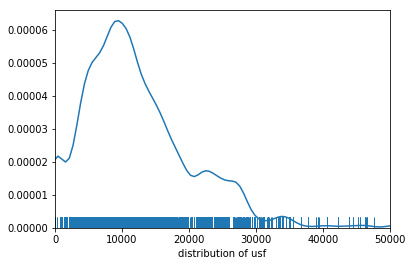

In [138]:
usf_desk_df.columns = ['distribution of usf', 'distribution of desk_count', 'distribution of usf_per_desk']
dis1 = sns.distplot(usf_desk_df['distribution of usf'], hist=False, rug=True)
dis1.set_xlim(0, 50000)
usf_desk_df['distribution of usf'].describe()

count    10472.000000
mean       230.724312
std        157.200509
min          2.000000
25%        116.000000
50%        193.000000
75%        305.000000
max       1775.000000
Name: distribution of desk_count, dtype: float64

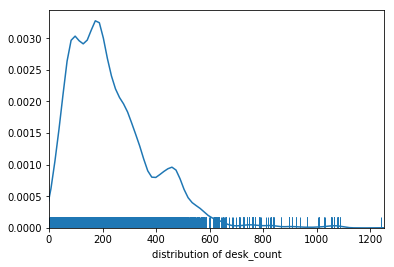

In [139]:
dis2 = sns.distplot(usf_desk_df['distribution of desk_count'], hist=False, rug=True)
dis2.set_xlim(0, 1250)
usf_desk_df['distribution of desk_count'].describe()

count    10472.000000
mean        60.292630
std         99.364230
min          0.000000
25%         49.193779
50%         54.229299
75%         61.521739
max       7700.000000
Name: distribution of usf_per_desk, dtype: float64

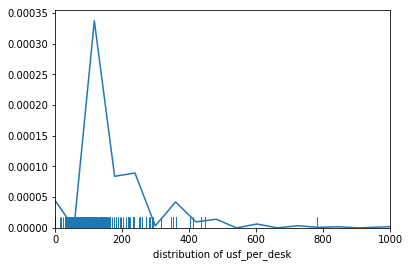

In [140]:
dis3 = sns.distplot(usf_desk_df['distribution of usf_per_desk'], hist=False, rug=True)
dis3.set_xlim(0, 1000)
usf_desk_df['distribution of usf_per_desk'].describe()

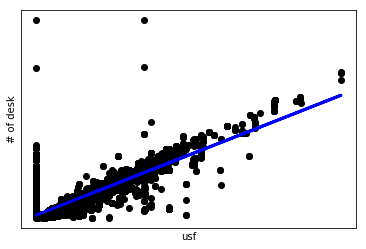

In [143]:
# A simple model show relationship between usf and num of desk
# This might help us determine how many desks we need to achieve given a new floor]

import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(usf_desk_df['distribution of usf']).reshape(-1, 1)
y = np.array(usf_desk_df['distribution of desk_count'])

model = LinearRegression().fit(x, y)

# performance r_score
r_sq = model.score(x, y)
y_pred = model.predict(x)

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('usf')
plt.ylabel('# of desk')


plt.xticks(())
plt.yticks(())

plt.show()

In [38]:
# Check some other feature 
floor.floor_to_bottom_of_beam.dropna().value_counts()

0.000000     30650
9.500000        29
10.583333       21
10.666667       10
11.833333       10
13.779528        9
10.333333        8
11.059896        8
10.333333        6
14.666667        6
11.059896        4
9.916667         4
14.666667        4
8.833333         4
11.500000        3
12.083333        3
12.500000        2
8.604167         1
15.333333        1
Name: floor_to_bottom_of_beam, dtype: int64

In [113]:
# Check shape!!!

# how much are irregular, how much are ploygon, etc
# 

# 2. room table

In [5]:
room_df = pd.read_csv('room_CLEANED.csv')

In [6]:
print(room_df.columns)
print(room_df.shape)
room_df.head()

Index(['Unnamed: 0', 'uuid', 'floor_id', '_fivetran_synced', 'area',
       'average_minimum_span', 'centroid', 'desk_count',
       'executive_office_count', 'extra_furniture_count', 'has_window', 'id',
       'internal_room_count', 'level', 'location', 'name', 'number', 'outline',
       'percent_utilizable_area', 'physical_desk_count', 'plan_irregularity',
       'program_type', 'room_boundaries', 'soft_seating_count', 'table_count',
       'transparency_ratio', 'uuid.1', 'work_units'],
      dtype='object')
(10000, 28)


,Unnamed: 0,uuid,floor_id,_fivetran_synced,area,average_minimum_span,centroid,desk_count,executive_office_count,extra_furniture_count,...,percent_utilizable_area,physical_desk_count,plan_irregularity,program_type,room_boundaries,soft_seating_count,table_count,transparency_ratio,uuid.1,work_units
0,0,c3908d85-7f57-45ed-b2c8-d2ba2c25037b,00018f5b-75e0-4f27-a01a-576fd6b9050a,2018-11-13 05:13:27.541,561.338446,NaN,"(75.0326833527142, 83.0380577427822, 28)",18.0,NaN,NaN,...,NaN,18.0,NaN,WORK,NaN,0.0,NaN,NaN,d21dce25-60f4-4271-b214-85c109e9a99a-008e1cde,18.0
1,1,119e406f-ff59-4019-ad88-f14376e93d57,00018f5b-75e0-4f27-a01a-576fd6b9050a,2018-11-13 05:13:27.541,521.356456,NaN,"(108.251187289722, 39.1322180765581, 28)",19.0,NaN,NaN,...,NaN,19.0,NaN,WORK,NaN,0.0,NaN,NaN,d21dce25-60f4-4271-b214-85c109e9a99a-008e1cd2,19.0
2,2,a9064324-9c09-426e-998f-bb066aead2e6,00018f5b-75e0-4f27-a01a-576fd6b9050a,2018-11-13 05:13:27.541,552.086156,NaN,"(53.4296649800107, 15.2130565066544, 28)",24.0,NaN,NaN,...,NaN,24.0,NaN,WORK,NaN,0.0,NaN,NaN,d21dce25-60f4-4271-b214-85c109e9a99a-008e1cd0,24.0
3,3,37801461-6d16-4f21-bc72-f1183ba67dd8,00018f5b-75e0-4f27-a01a-576fd6b9050a,2018-11-13 05:13:27.541,919.675707,NaN,"(104.675038224688, 15.2559057406001, 28)",31.0,NaN,NaN,...,NaN,31.0,NaN,WORK,NaN,0.0,NaN,NaN,d21dce25-60f4-4271-b214-85c109e9a99a-008e1cec,31.0
4,4,45bc8773-69d1-49a2-8f9a-662c29265fe7,00018f5b-75e0-4f27-a01a-576fd6b9050a,2018-11-13 05:13:27.541,280.756484,NaN,"(71.1409510692495, 19.4484300940098, 28)",0.0,NaN,NaN,...,NaN,0.0,NaN,MEET,NaN,0.0,NaN,NaN,d21dce25-60f4-4271-b214-85c109e9a99a-008e1cea,0.0


In [7]:
# "Work" - Offices
# "Meet" - Conference Rooms
# "We" - Lounge space + Phone Booths + Pantry / other shared amenities 
# "Operate" - back of house functions like IT closets, janitorial closets
# "Circulate" - hallways between spaces of other types

room_df.program_type.value_counts()

WORK              5033
MEET              1293
WE                1056
OPERATE            859
CIRCULATE          673
WASH               660
SERVE              306
EAT & DRINK         45
INFRASTRUCTURE      41
We                   7
THRIVE               7
Meet                 4
Circulate            3
Work                 3
PLAY                 2
Operate              2
Wash                 2
Name: program_type, dtype: int64

In [33]:
room_df.loc[room_df.program_type == 'Work', 'program_type'] = 'WORK'
room_df.loc[room_df.program_type == 'Meet', 'program_type'] = 'MEET'
room_df.loc[room_df.program_type == 'We', 'program_type'] = 'WE'
room_df.loc[room_df.program_type == 'Operate', 'program_type'] = 'OPERATE'
room_df.loc[room_df.program_type == 'Circulate', 'program_type'] = 'CIRCULATE'
room_df.loc[room_df.program_type == 'Wash', 'program_type'] = 'WASH'
room_df.program_type.value_counts()


WORK              5036
MEET              1297
WE                1063
OPERATE            861
CIRCULATE          676
WASH               662
SERVE              306
EAT & DRINK         45
INFRASTRUCTURE      41
THRIVE               7
PLAY                 2
Name: program_type, dtype: int64

In [43]:
import numpy as np
import matplotlib.pyplot as plt

prgram_type_name = ['WORK', 'MEET', 'WE', 'OPERATE', 'CIRCULATE']
 
work = room_df[room_df['program_type'] == 'WORK']
meet = room_df[room_df['program_type'] == 'MEET']
we = room_df[room_df['program_type'] == 'WE']
operate = room_df[room_df['program_type'] == 'OPERATE']
circulate = room_df[room_df['program_type'] == 'CIRCULATE']


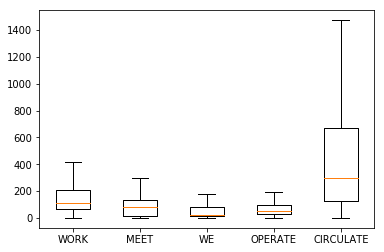

In [177]:
data = [work.area, meet.area, we.area, operate.area, circulate.area]
fig7, ax7 = plt.subplots()
# ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data, labels= prgram_type_name, showfliers=False)

plt.show()

In [164]:
# Check Area of each room type
print(room_df.area.mean())
print(work.area.mean())
print(meet.area.mean())
print(we.area.mean())
print(operate.area.mean())
print(circulate.area.mean())

218.22342402285798
248.9759015586072
93.16754659284884
186.93971616620578
80.64734501160298
550.4085476732915


In [51]:
meet.desk_count.sum()

14.0

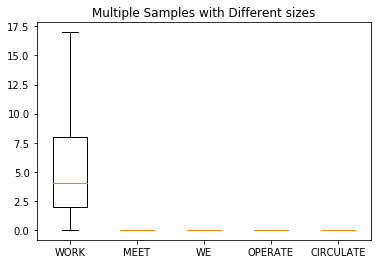

In [56]:
data = [work.desk_count.dropna(), meet.desk_count.dropna(), we.desk_count.dropna(), operate.desk_count.dropna(), circulate.desk_count.dropna()]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data, labels= prgram_type_name, showfliers=False)

plt.show()

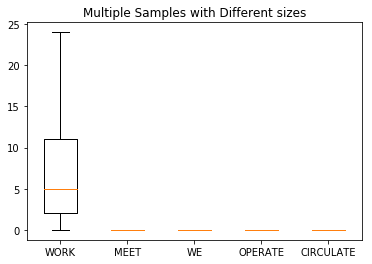

In [72]:
data = [work.physical_desk_count.dropna(), meet.physical_desk_count.dropna(), we.physical_desk_count.dropna(), operate.physical_desk_count.dropna(), circulate.physical_desk_count.dropna()]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data, labels= prgram_type_name, showfliers=False)
plt.show()

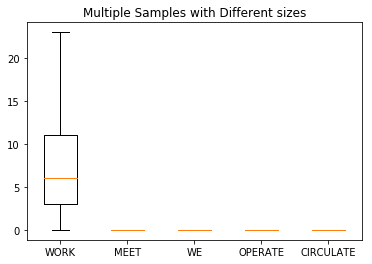

In [78]:
data = [work.work_units.dropna(), meet.work_units.dropna(), we.work_units.dropna(), operate.work_units.dropna(), circulate.work_units.dropna()]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data, labels= prgram_type_name, showfliers=False)

plt.show()

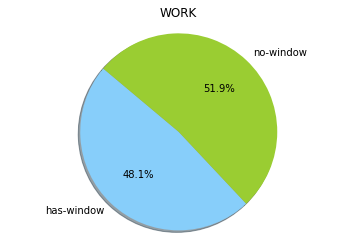

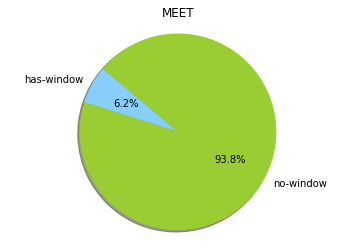

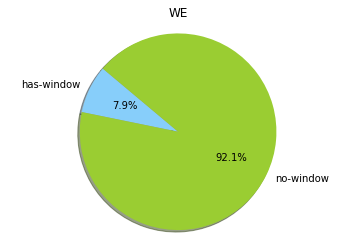

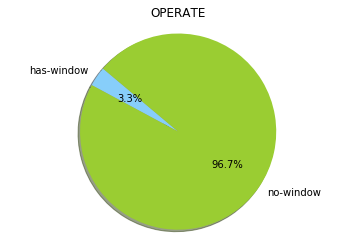

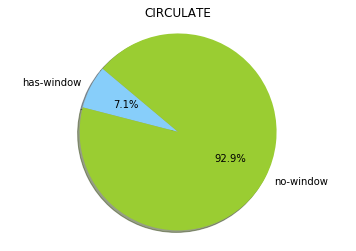

In [89]:
# Data to plot
labels = ['has-window', 'no-window']
sizes = [work.has_window.sum(), sum(work.has_window == False)]
colors = ['lightskyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

# Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("WORK")

plt.axis('equal')
plt.show()


# Data to plot
labels = ['has-window', 'no-window']
sizes = [meet.has_window.sum(), sum(meet.has_window == False)]
colors = ['lightskyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

# Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("MEET")

plt.axis('equal')
plt.show()


# Data to plot
labels = ['has-window', 'no-window']
sizes = [we.has_window.sum(), sum(we.has_window == False)]
colors = ['lightskyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

# Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("WE")

plt.axis('equal')
plt.show()


# Data to plot
labels = ['has-window', 'no-window']
sizes = [operate.has_window.sum(), sum(operate.has_window == False)]
colors = ['lightskyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

# Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("OPERATE")

plt.axis('equal')
plt.show()

# Data to plot
labels = ['has-window', 'no-window']
sizes = [circulate.has_window.sum(), sum(circulate.has_window == False)]
colors = ['lightskyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

# Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("CIRCULATE")

plt.axis('equal')
plt.show()

In [176]:
mean_area_per_floor = np.array(room_df.groupby(['floor_id']).area.sum()).mean()
mean_area_per_floor

11190.944821685023

In [175]:
mean_room_per_floor = np.array(room_df.groupby(['floor_id']).count()['Unnamed: 0']).mean()
mean_room_per_floor

51.282051282051285

In [105]:
relation = room_df.groupby(['floor_id','program_type']).size().reset_index()
relation.columns = ['floor_id', 'program_type', 'count']

In [144]:
room_number_per_prog = relation.groupby('program_type').mean().sort_values(by = ['count'], ascending=False)

In [152]:
room_number_per_prog

,count
program_type,
WORK,26.505263
WE,8.504000
MEET,7.629412
OPERATE,4.837079
SERVE,3.825000
WASH,3.698324
CIRCULATE,3.576720
INFRASTRUCTURE,2.411765
EAT & DRINK,1.875000


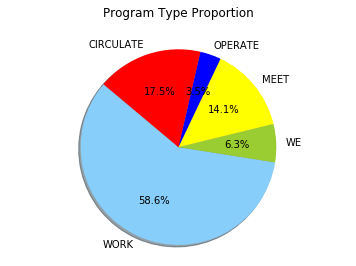

In [174]:
# Data to plot
labels = ['WORK', 'WE', 'MEET', 'OPERATE', 'CIRCULATE']

work_area = work.area.mean() * float(room_number_per_prog.iloc[0])
meet_area = meet.area.mean() * float(room_number_per_prog.iloc[2])
we_area = we.area.mean() * float(room_number_per_prog.iloc[1])
operate_area = operate.area.mean() * float(room_number_per_prog.iloc[3])
circulate_area = circulate.area.mean() * float(room_number_per_prog.iloc[6])
# whole = mean_area_per_floor
# others = whole - work_area - meet_area - we_area - operate_area - circulate_area

sizes = [work_area, meet_area, we_area, operate_area, circulate_area]
colors = ['lightskyblue', 'yellowgreen', 'yellow', 'blue', 'red']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Program Type Proportion\n")

plt.axis('equal')
plt.show()

